# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [x] Inspect the shapes of the training and test sets to confirm their size and structure.
- [x] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [x] Visualize a few images from the dataset to understand what the data looks like.

In [19]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [20]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
# Inspect the shapes of the datasets
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f'After one-hot encoding: {y_train[0]}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
Before one-hot encoding: 9
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


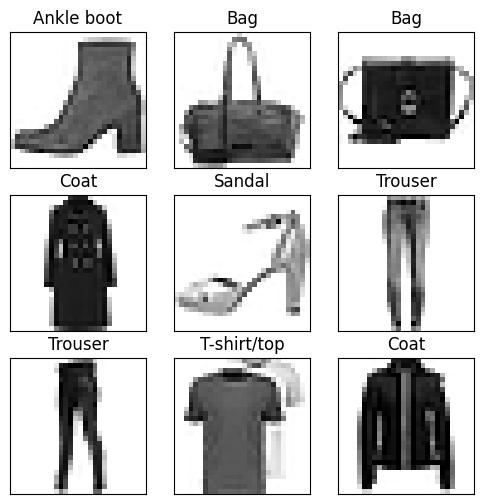

In [22]:
import matplotlib.pyplot as plt
import numpy as np
# Verify the data looks as expected
# Selecting 9 random indices
random_indices = np.random.choice(len(X_train), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    label = np.argmax(y_train[random_indices[i]])
    ax.set_title(class_names[label])

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

In the samples, the labels and images look matched. The images don't have a too good quality due to low resolution. I don't see any issues yet.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [x] Create a simple linear regression model using Keras.
- [x] Compile the model with an appropriate loss function and optimizer.
- [x] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images into 784-dimensional vectors
model.add(Dense(28, activation='relu'))  # 64 neurons, ReLU activation

# Hidden layer
model.add(Dense(28, activation='relu'))  # 64 neurons, ReLU activation

# Output layer
model.add(Dense(10, activation='softmax'))  # 10 neurons, softmax activation

model.summary()

# Compile the model using `model.compile()`
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model with `model.fit()`
model.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=5, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)

# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

/opt/homebrew/Caskroom/miniconda/base/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 28)             │        21,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 28)             │           812 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,082 (90.16 KB)

 Trainable params: 23,082 (90.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6961 - loss: 0.8877 - val_accuracy: 0.8164 - val_loss: 0.5306
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.8279 - loss: 0.4975 - val_accuracy: 0.8339 - val_loss: 0.4913
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8361 - loss: 0.4803 - val_accuracy: 0.8347 - val_loss: 0.4926
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 46ms/step - accuracy: 0.8361 - loss: 0.4960 - val_accuracy: 0.8394 - val_loss: 0.4914
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.8308 - loss: 0.5126 - val_accuracy: 0.8067 - val_loss: 0.5795
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7991 - loss: 0.5939
Loss:     0.61
Accuracy: 79.65%


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

It's not too good. Worse than my expectation. I think it's because of overfitting, because the accuracy began to decrease in the last epoch.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [x] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [x] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [x] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [29]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Convolutional layer with 32 filters
model.add(Flatten())  # Flatten the feature maps
model.add(Dense(10, activation='softmax'))  # Output layer

# Train the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')


/opt/homebrew/Caskroom/miniconda/base/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8037 - loss: 0.5631 - val_accuracy: 0.8748 - val_loss: 0.3448
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8904 - loss: 0.3051 - val_accuracy: 0.8920 - val_loss: 0.3076
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9077 - loss: 0.2585 - val_accuracy: 0.8992 - val_loss: 0.2921
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9199 - loss: 0.2263 - val_accuracy: 0.9008 - val_loss: 0.2890
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9284 - loss: 0.2000 - val_accuracy: 0.9026 - val_loss: 0.2823
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9014 - loss: 0.3024
Loss:     0.30
Accuracy: 89.85%


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

Yes, it did. Increased about 10% in accuracy. I think the convolution did contribute.

# 4. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [x] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [x] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [x] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [x] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [ ]:
# A. Test Hyperparameters
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

filter_results = {}
for filter in [16, 32, 64, 128]:
    print(f'\nTraining CNN with {filter} filters in the Conv2D layer.')
    # Create a simple CNN model
    model = Sequential()
    model.add(Conv2D(filter, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Convolutional layer with 32 filters
    model.add(Flatten())  # Flatten the feature maps
    model.add(Dense(10, activation='softmax'))  # Output layer

    # Train the model
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    model.fit(
        X_train,
        y_train,
        epochs=5,
        batch_size=32,
        validation_split=0.2
    )
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    filter_results[filter] = {
        loss,
        accuracy
    }



Training CNN with 16 filters in the Conv2D layer.


/opt/homebrew/Caskroom/miniconda/base/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7956 - loss: 0.5955 - val_accuracy: 0.8771 - val_loss: 0.3481
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8853 - loss: 0.3168 - val_accuracy: 0.8782 - val_loss: 0.3370
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9019 - loss: 0.2729 - val_accuracy: 0.8884 - val_loss: 0.3167
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9122 - loss: 0.2445 - val_accuracy: 0.8936 - val_loss: 0.3066
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9213 - loss: 0.2205 - val_accuracy: 0.8986 - val_loss: 0.2893
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8948 - loss: 0.3039
Loss:     0.30
Accuracy: 89.15%

Training CNN with 32 filters in the Conv2D layer.
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8045 - loss: 0.5516 - val_accuracy: 0.8813 - val_loss: 0.3294
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step -

In [33]:
for filter, (loss, accuracy) in filter_results.items():
    print(f'\nResults for {filter} filters:')
    print(f'Loss:     {loss:.2f}')
    print(f'Accuracy: {accuracy*100:.2f}%')


Results for 16 filters:
Loss:     0.30
Accuracy: 89.15%

Results for 32 filters:
Loss:     0.31
Accuracy: 89.31%

Results for 64 filters:
Loss:     0.32
Accuracy: 89.70%

Results for 128 filters:
Loss:     0.32
Accuracy: 89.46%


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.DataFrame.from_dict(
    filter_results, 
    orient='index', 
    columns=['test_loss', 'test_accuracy'] # 给这两列命名
)

results_df.index.name = 'filter'

results_df = results_df.sort_values(by='test_accuracy', ascending=False)

print("Model Performance Comparison")
display(results_df)

Model Performance Comparison


,test_loss,test_accuracy
filter,,
64,0.315981,0.8970
128,0.318618,0.8946
32,0.309458,0.8931
16,0.304365,0.8915


In [51]:
# B. Test presence or absence of regularization
from keras.layers import Conv2D, Flatten, Dropout, Dense

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

dropouts = [0.0, 0.1, 0.2, 0.3, 0.5]
dropout_results = {}

# Create a simple CNN model
for dropout in dropouts:
    print(f'\nTraining CNN with Dropout = {dropout}.')
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Convolutional layer with 32 filters
    model.add(Flatten())  # Flatten the feature maps
    if dropout > 0.0:
        model.add(Dropout(dropout))  # Dropout layer for regularization
    model.add(Dense(10, activation='softmax'))  # Output layer

    # Train the model
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    model.fit(
        X_train,
        y_train,
        epochs=5,
        batch_size=32,
        validation_split=0.2
    )
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    dropout_results[dropout] = (loss, accuracy)



Training CNN with Dropout = 0.0.


/opt/homebrew/Caskroom/miniconda/base/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.8102 - loss: 0.5315 - val_accuracy: 0.8797 - val_loss: 0.3351
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.8986 - loss: 0.2819 - val_accuracy: 0.8886 - val_loss: 0.3116
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9136 - loss: 0.2399 - val_accuracy: 0.8977 - val_loss: 0.2889
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9242 - loss: 0.2093 - val_accuracy: 0.8953 - val_loss: 0.3032
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9356 - loss: 0.1754 - val_accuracy: 0.8941 - val_loss: 0.3112
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8879 - loss: 0.3353

Training CNN with Dropout = 0.1.
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8097 - loss: 0.5376 - val_accuracy: 0.8801 - val_loss: 0.3301
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.8970 - loss: 0.2867 - val_accuracy:

In [53]:
for dropout, (loss, accuracy) in dropout_results.items():
    print(f'\nResults for Dropout = {dropout}:')
    print(f'Loss:     {loss:.2f}')
    print(f'Accuracy: {accuracy*100:.2f}%')


Results for Dropout = 0.0:
Loss:     0.32
Accuracy: 88.73%

Results for Dropout = 0.1:
Loss:     0.31
Accuracy: 89.26%

Results for Dropout = 0.2:
Loss:     0.30
Accuracy: 89.65%

Results for Dropout = 0.3:
Loss:     0.30
Accuracy: 89.85%

Results for Dropout = 0.5:
Loss:     0.31
Accuracy: 89.25%


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.DataFrame.from_dict(
    dropout_results, 
    orient='index', 
    columns=['test_loss', 'test_accuracy'] # 给这两列命名
)

results_df.index.name = 'dropout'

results_df = results_df.sort_values(by='test_accuracy', ascending=False)

print("Model Performance Comparison")
display(results_df)

Model Performance Comparison


,test_loss,test_accuracy
dropout,,
0.3,0.297577,0.8985
0.2,0.299087,0.8965
0.1,0.307433,0.8926
0.5,0.307957,0.8925
0.0,0.323756,0.8873


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

For the filter value, when it goes up, the accuracy increases, and the loss too. But when it goes over 32, the accuracy decreases, and the loss stagnates.

For the dropout, dropout of 0.3 has the best accuracy and loss.

When the filter value is 64 and the dropout is 0.3, it can improve the model's performance.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [x] Compile the final model with the best hyperparameters and regularization techniques.
- [x] Train the final model on the training set and evaluate it on the test set.
- [x] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [56]:
from keras.layers import Conv2D, Flatten, Dropout, Dense

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Convolutional layer with 32 filters
model.add(Flatten())  # Flatten the feature maps
model.add(Dropout(0.3))  # Dropout layer for regularization
model.add(Dense(10, activation='softmax'))  # Output layer

# Train the model
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')


/opt/homebrew/Caskroom/miniconda/base/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8122 - loss: 0.5376 - val_accuracy: 0.8868 - val_loss: 0.3266
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.8960 - loss: 0.2937 - val_accuracy: 0.8924 - val_loss: 0.3049
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9073 - loss: 0.2533 - val_accuracy: 0.8963 - val_loss: 0.2980
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.9193 - loss: 0.2247 - val_accuracy: 0.8997 - val_loss: 0.2884
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9294 - loss: 0.1993 - val_accuracy: 0.8977 - val_loss: 0.2921
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8993 - loss: 0.2999
Loss:     0.30
Accuracy: 89.67%


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

The final model's much better than the baseline. But when it compares to the CNN model, there's not much difference. I think it's because the combination of two best hyperparameters don't necessarily have the best performance, because the hyperparameters are interdependent.

If I had time, I would tune other hyperparameters, such as kernal size, number of layers.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [x] Created a branch with the correct naming convention.
- [x] Ensured that the repository is public.
- [x] Reviewed the PR description guidelines and adhered to them.
- [x] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.